# St. Kilda Pier (SKP)

## SKP v2

SKP v2 는 데이터 사이언스를 위해 필요한 도구들의 설치 및 사용에 대한 Native / Docker / Kubernetes 상에서의 공통된 패턴을 작은 프로젝트 단위로 제공하는 패키지입니다. 기존의 모든 도구를 하나의 프로젝트에서 제공하는 것과 달리 제공되는 프로젝트 중에서 자신의 목적에 맞는 프로젝트를 골라서 공통된 사용패턴을 통해 사용할 수 있도록 제공하는 방식을 지향합니다.

### Naming Rule

Github 프로젝트 네이밍은 skp_[n4e/d4r/k8s]_[tool name] 형식을 따릅니다.

* n4e(Native): 최소한의 가상환경만을 이용하여 도구의 설치 및 사용
* d4r(Docker): 경량 가상화 환경인 도커상에서 도구의 설치 및 사용
* k8s(Kubernetes): 경량 가상화 클러스터인 쿠버네티스상에서 도구의 설치 및 사용

### Install Dependency

개발/테스트 장비는 Ubuntu 를 사용합니다.

* Ubuntu 18.04 / 20.04 LTS
* macOS BigSur

사용을 위한 계정을 skp 로 가정한다면 프로젝트를 위한 최상위 디렉토리를 생성한 후, 하위에서 아래와 같이 도구와 데이터가 분리된 형태로 구성하여 사용합니다.

```
/home/skp/skp
/home/skp/skp/skp_n4e_vscode
/home/skp/skp/skp_n4e_jupyter
/home/skp/skp/skp_n4e_jupyter_data
...
```

#### Ubuntu 

##### Manual Install

**Sudoers**

sudo 명령을 통해 권한을 업그레이드 하는 경우가 많기 때문에 자동 수행을 위해 암호 없이 사용 가능하도록 설정합니다.

visudo 명령을 이용하여 sudo 권한 사용자가 암호를 넣지 않아도 되도록 NOPASSWD 설정을 추가합니다.

```bash
> sudo apt install -y vim
> sudo EDITOR=vim visudo

%sudo   ALL=(ALL:ALL) NOPASSWD:ALL

```

사용자를 sudo 그룹에 추가하고 id 명령을 통해 현재 잘 추가 되었는지 확인합니다.

```bash
> sudo usermod -aG sudo $USER
> id
uid=192435321($USER) gid=27(sudo)
```

id를 통해서 sudo gid가 잘 적용되지 않을 경우에는 system reboot을 해줍니다.

**Git**

소스의 버전을 관리하기 위해 버전 관리 툴인 git을 설치합니다.

```bash
> sudo apt-get update
> sudo apt install git-all
```

**direnv**

```bash
> sudo apt-get update
> sudo apt-get install -y --no-install-recommends direnv
> echo 'eval "$(direnv hook bash)"' >> ~/.bashrc
> source ~/.bashrc 
```

**pyenv, virtualenv**

```bash
> sudo apt-get update
> sudo apt-get install -y make build-essential libssl-dev zlib1g-dev libbz2-dev \
libreadline-dev libsqlite3-dev wget curl llvm libncurses5-dev libncursesw5-dev \
xz-utils tk-dev libffi-dev liblzma-dev

> curl https://pyenv.run | bash
```

pyenv를 이용해 파이썬 여러 버전을 설치합수 있습니다. 파이썬 빌드시 필요한 의존성 패키지와 주로 사용하는 2.x 대와 3.x 대의 최신 버전을 설치해 봅니다. 2.x 의 지원종료가 다가오기에 3.x 사용을 추천합니다. (https://stackoverflow.com/questions/58700384/how-to-fix-typeerror-an-integer-is-required-got-type-bytes-error-when-tryin) 

**jq**

Shell 상에서 JSON 형식의 데이터를 다루는 명령어기반 유틸리티 입니다.
 
https://www.44bits.io/ko/post/cli_json_processor_jq_basic_syntax

```bash
> sudo apt-get install -y jq
```

**envsubst**

kubernetes 템플릿 파일에서 환경 변수를 사용할 수 있도록 파일내에 환경 변수를 치환 하는 툴입니다.

Strings to be replaced should be in either `${var}` or `$var` format.

https://command-not-found.com/envsubst

```bash
> sudo apt-get install -y gettext-base
```

##### Vagrant

SKP의 설치 테스트를 위해 VM 가상환경이 필요할 경우 Vagrant를 이용한 VM을 생성하여 사용합니다. (관련한 상세 설명은 이전 Vagrant & Virtual Box 섹션의 내용을 참조하세요.)

* https://github.com/comafire/vagrant_skp_single

##### Ansbible

이제 준비된 가상환경에 SKP 설치를 위한 기본 패키지 설치는 Ansible을 이용합니다. (관련한 상세 설명은 이전 Ansible 섹션의 내용을 참조하세요.)

* https://github.com/comafire/ansible_skp_ubuntu

#### macOS

**Home brew**

OSX 에서 편리하게 linux 개발 툴을 사용하기 위해 필수적으로 필요한 패키지 관리자입니다. (http://brew.sh/index_ko.html)

설치는 간단합니다. 아래와 같이 xcode 개발 툴 설치 후, brew 설치 스크립트를 수행해 주면 됩니다.

```bash
> xcode-select --install
> /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
```

**Git**

소스의 버전을 관리하기 위해 brew 를 통해 버전 관리 툴인 git을 설치합니다.

```bash
> brew update
> brew install git
> brew install git-flow-avh
```

**direnv, pyenv, pyenv-virtualenv**

```bash
> brew update
> brew install pyenv
> brew install pyenv-virtualenv
> brew install direnv
> brew install gdbm jq gettext
> echo 'eval "$(direnv hook zsh)"' >> ~/.zshrc 
```

pyenv를 이용해 파이썬 여러 버전을 설치합수 있습니다. 파이썬 빌드시 필요한 의존성 패키지 (gdbm)와 주로 사용하는 2.x 대와 3.x 대의 최신 버전을 설치해 봅니다. 2.x 의 지원종료가 다가오기에 3.x 사용을 추천합니다. (https://stackoverflow.com/questions/58700384/how-to-fix-typeerror-an-integer-is-required-got-type-bytes-error-when-tryin) 

여기까지 설치가 되었다면 이제 서브 섹션에서 소개되는 프로젝트들 중에 자신이 필요한 것들을 설치해서 사용하면 됩니다.


## SKP v1 (Will be deprecated)

**Docker Cluster based Data Science Platform for Big Data**

데이터 사이언스를 하면서 그동안 필요한 많은 도구들을 설치하고 설정하는 작업을 진행해 오다가, 개인적으로 시작때 마다 하는 삽질의 양을 줄이기 위해 사용해보고 좋은 도구들은 Docker 에 넣어서 플랫폼화 하는 작업을 해왔습니다.

개인적인 중/소규모 데이터 사이언스 프로젝트를 진행하는데, 클라우드에 분석 클러스터를 올려놓고 쓰기에는 비용이 부담스러운 면이 없지 않아 있습니다. 그래서, **St. Kilda Pier**(리틀 펭귄이 서식하는 호주 멜버른의 작은 부두, 이하 SKP)라는 이름으로 데이터 사이언스 전반에 필요한 좋은 도구들을 좀 편하게 설치하고 사용할 수 있도록 정리해보았습니다.

St. Kilda Pier(SKP)는 Big Data 를 이용하여 Data Science 를 하기 위한 Docker 기반 중소형 클러스터를 쉽게 구축 할 수 있도록 지원하는 플랫폼입니다.

SKP는 Python Invoke, SSH Remote Command, Docker-Machine 를 이용해 Docker를 이용한 Big Data Cluster 구축 시 필요한 컨테이너 이미지 및 명령어 셋을 지원합니다.

* st-kilda-pier: https://github.com/comafire/st-kilda-pier

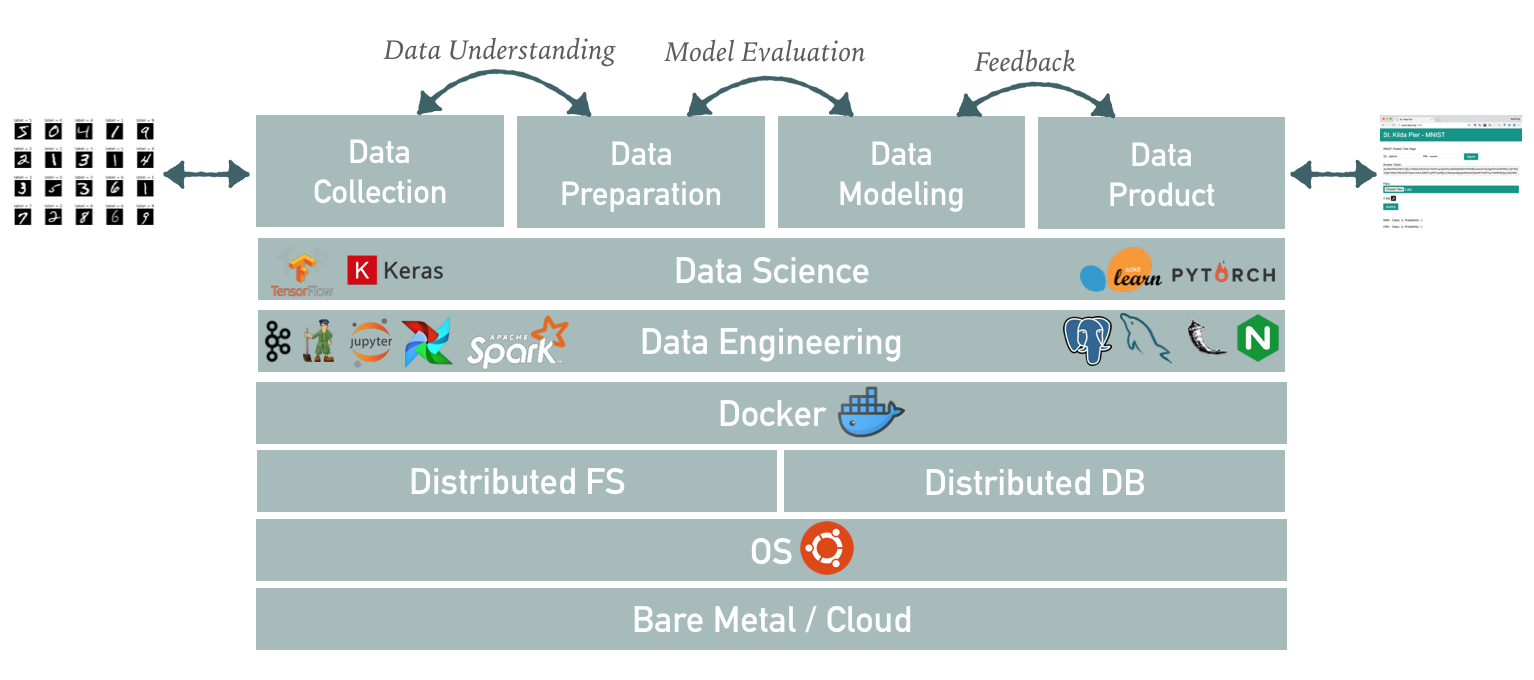

In [1]:
# St. Kilda Pier Architecture
from IPython.display import Image

Image('../galleries/2018-st-kilda-pier-001.png', width=1024)